# PROBLEM STATEMENT

*Implementation of Random Forest*

1. Import Libraries
2. Load the Dataset and Pre-Processing
3. Implement Random Forest
4. Model Predictions and Accuracy

The Dataset is a ***Red-Wine Quality***.

### Module 1 : Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve

<hr>

### Module 2 : Loading the Dataset, Pre-Processing and Data Preparation

In [ ]:
df = pd.read_csv("./winequality-red.csv")

print(df['quality'].value_counts(), end=" ")

def quality_to_label(quality):
    if quality <= 5:
        return 0
    else:
        return 1

df['quality_class'] = df['quality'].apply(quality_to_label)

df.head(2)

print(df.shape)
df = df.dropna(axis=0, how='any')
print(df.shape)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64 (1599, 13)
(1599, 13)


Data Preparation and Scaling

In [ ]:
X = df.drop(['quality','quality_class'], axis = 'columns')
Y = df['quality_class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, end="\t")
print(y_train.shape)

print(X_test.shape, end="\t")
print(y_test.shape)

(1119, 11)	(1119,)
(480, 11)	(480,)


In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

<hr>

### Module 3 : Model Building and Training

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Visualizing the tree

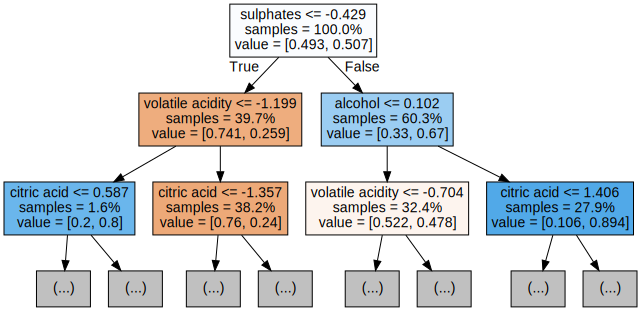

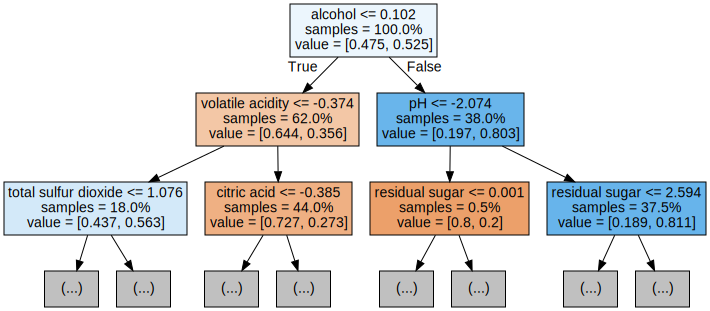

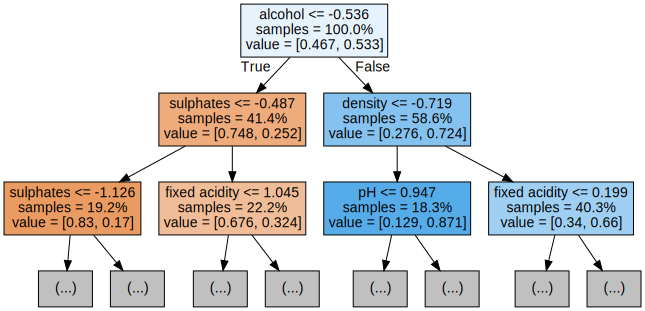

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<hr>

### Module 4 : Predictions and Model Accuracy

In [ ]:
preds = rf.predict(X_test)

preds [0:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1score = f1_score(y_test, preds)
fpr, tpr, _ = roc_curve(y_test, preds)

print(f"ACCURACY : {accuracy} \t PRECISION : {precision} \t RECALL : {recall} \t F1 SCORE : {f1score}")

ACCURACY : 0.8020833333333334 	 PRECISION : 0.8138686131386861 	 RECALL : 0.8352059925093633 	 F1 SCORE : 0.8243992606284658


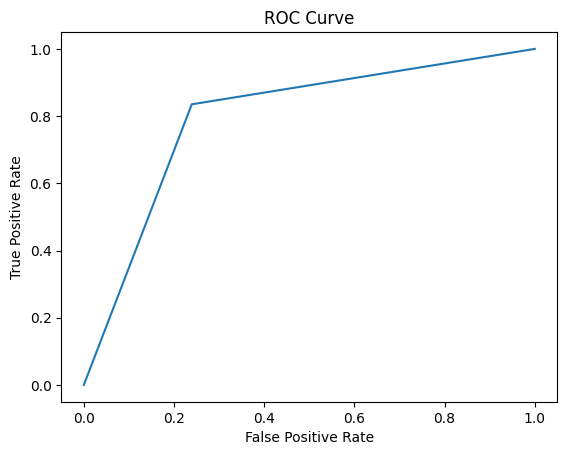

In [ ]:
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

<hr><hr>